In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#aby sme dosiahli rovnaké výsledky nastavíme seed generátora náhodných čísel, ktorý sa v algoritmoch neurónovej siete využíva na číslo 10 , 
#nejde o to aké je tam číslo hlavné je aby bolo zakaždým spustením rovnaké a to zabezpečí generovanie rovnakej sekvencie náhodných čísiel
np.random.seed(10)
# načíta dataset prostredníctvom knižnice numpy, zadaný je súbor, ktorý sa má načítať a oddeľovač údajov v súbore (,)
dataset = np.loadtxt("PUBG-dataset_top3.csv", delimiter=",")
# do premennej X načíta 4 stĺpce z datasetu a do premennej Y načíta piaty 
X = dataset[:,0:4]
Y = dataset[:,4]
# keďže stĺpce obsahujjú dáta, ktoré majú veľmi odlišné hodnoty (napr. 4000 a 12) je nutné ich škálovať aby boli hodnoty podobné a na to slúži StandardScaler
scaler = StandardScaler()
#vyškáluje hodnoty uložené v X a prepíše nimi pôvodné hodnoty
X=scaler.fit_transform(X)
#vytvorí sekvenčný model, do ktorého sa následne pridajú vrstvy, ktoré budú prepojené
model = Sequential()
#pridá vrstvu triedy Dense s 20 neurónmi, 4 vstupmi (počet stĺpcov X) a aktivačnou funkciou relu
model.add(Dense(20, input_dim=4, activation='relu'))
#pridá vrstvu triedy Dense s 5 neurónmi a aktivačnou funkciou relu
model.add(Dense(5, activation='relu'))
#pridá vrstvu triedy Dense s 1 neurónom a aktivačnou funkciou relu
model.add(Dense(1, activation='relu'))
# skompiluje model, ako funkciu na rátanie chyby nastaví mean_squared_error, optimizér adam a ako metriku accuracy (zabezpečí že budeme vidieť presnosť)
model.compile(loss="mean_squared_error", optimizer='adam', metrics=['accuracy'])
# spustí trénovanie, zadané sú vstupné premenné (X), výstupné premenné (Y), využitá je funkcionalita knižnice Keras 
#kde nastavením parametra validation_split=0.373 je určené, že 37,3% datasetu bude použitých ako testovacie dáta,(37,3% v tomto prípade pekne rozdelí dataset) 
#prameter epochs=60 určí, že sieť sa bude učiť v 60 krokoch a  batch_size=20 určí, že bude brať z datasetu skupiny po 20 záznamov,
#výsledky uloží do premennej history, ktorá je potrebná na vykreslenie grafov
history=model.fit(X, Y, validation_split=0.373, epochs=100, batch_size=20)

Using TensorFlow backend.


Train on 300 samples, validate on 180 samples
Epoch 1/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2344 - acc: 0.6433 - val_loss: 0.2168 - val_acc: 0.6889
Epoch 2/100
300/300 [==============================] - 0s 102us/step - loss: 0.1918 - acc: 0.6967 - val_loss: 0.2019 - val_acc: 0.7111
Epoch 3/100
300/300 [==============================] - 0s 127us/step - loss: 0.1777 - acc: 0.7367 - val_loss: 0.1928 - val_acc: 0.7111
Epoch 4/100
300/300 [==============================] - 0s 117us/step - loss: 0.1662 - acc: 0.7533 - val_loss: 0.1835 - val_acc: 0.7389
Epoch 5/100
300/300 [==============================] - 0s 100us/step - loss: 0.1574 - acc: 0.7633 - val_loss: 0.1745 - val_acc: 0.7500
Epoch 6/100
300/300 [==============================] - 0s 94us/step - loss: 0.1510 - acc: 0.7733 - val_loss: 0.1678 - val_acc: 0.7500
Epoch 7/100
300/300 [==============================] - 0s 109us/step - loss: 0.1444 - acc: 0.7733 - val_loss: 0.1615 - val_acc: 0.7444
Epoch 8/100


300/300 [==============================] - 0s 96us/step - loss: 0.0832 - acc: 0.8733 - val_loss: 0.0986 - val_acc: 0.8611
Epoch 62/100
300/300 [==============================] - 0s 102us/step - loss: 0.0832 - acc: 0.8767 - val_loss: 0.0984 - val_acc: 0.8611
Epoch 63/100
300/300 [==============================] - 0s 137us/step - loss: 0.0829 - acc: 0.8767 - val_loss: 0.0986 - val_acc: 0.8611
Epoch 64/100
300/300 [==============================] - 0s 112us/step - loss: 0.0830 - acc: 0.8767 - val_loss: 0.0984 - val_acc: 0.8611
Epoch 65/100
300/300 [==============================] - 0s 98us/step - loss: 0.0828 - acc: 0.8767 - val_loss: 0.0982 - val_acc: 0.8611
Epoch 66/100
300/300 [==============================] - 0s 95us/step - loss: 0.0826 - acc: 0.8767 - val_loss: 0.0980 - val_acc: 0.8611
Epoch 67/100
300/300 [==============================] - 0s 108us/step - loss: 0.0827 - acc: 0.8767 - val_loss: 0.0983 - val_acc: 0.8611
Epoch 68/100
300/300 [==============================] - 0s 98us/

In [2]:
#uloží výsledky modelu do premennej scores
scores = model.evaluate(X, Y)
# vypíše presnosť modelu
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

480/480 [==============================] - 0s 47us/step

acc: 87.50%


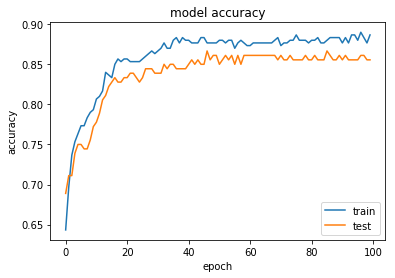

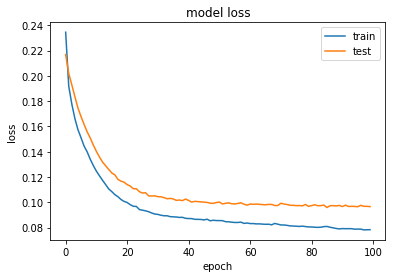

In [3]:
#vykreslenie grafov

#z premennej history bude vykreslovať hodnotu acc čiže presnosť siete na základe trénovacích dát
plt.plot(history.history['acc'])
#z premennej history bude vykreslovať hodnotu val_acc čiže presnosť siete na základe testovacích dát 
plt.plot(history.history['val_acc'])
#nadpis grafu
plt.title('model accuracy')
#popsi y osi
plt.ylabel('accuracy')
#popis x osi
plt.xlabel('epoch')
#legenda grafu (zobrazenie dole vpravo)
plt.legend(['train', 'test'], loc='lower right')
#zobraz graf
plt.show()

# zobrazuje chybu na základe trénovacích a testovacích dát
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [4]:
#do premennej predictions uloží predpoveď pre načítaný dataset či hráč skončil v top 3 alebo nie na základe naučených informácií 
predictions = model.predict(X)
# zaokrúhli výsledky aby sme dostali 0 alebo 1
rounded = [round(x[0]) for x in predictions]
#vypíše predikcie
print(rounded)

[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0,